<a href="https://colab.research.google.com/github/victorviro/ML_algorithms_python/blob/master/Gaussian_discriminant_analysis_and_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Learning algorithms

We have been talking about learning algorithms that model $p(y|x; \theta)$, the conditional distribution of $y$ given $x$. For instance, logistic regression modeled $p(y|x; \theta)$ as $h_{\theta}(x)=g(\theta^Tx)$ where $g$ is the sigmoid function. In this notebook, we’ll talk about a different type of learning algorithm.

Consider a classification problem in which we want to learn to distinguish
between elephants ($y = 1$) and dogs ($y = 0$), based on some features of
an animal. Given a training set, an algorithm like logistic regression or
the perceptron algorithm (basically) tries to find a straight line, that is, a
decision boundary that separates the elephants and dogs. Then, to classify
a new animal as either an elephant or a dog, it checks on which side of the
decision boundary it falls, and makes its prediction accordingly.

Here’s a different approach. First, looking at elephants, we can build a
model of what elephants look like. Then, looking at dogs, we can build a
separate model of what dogs look like. Finally, to classify a new animal, we
can match the new animal against the elephant model, and match it against
the dog model, to see whether the new animal looks more like the elephants
or more like the dogs we had seen in the training set.

Algorithms that try to learn $p(y|x)$ directly (such as logistic regression, see [notebook Logistic regression](https://github.com/victorviro/ML_algorithms_python/blob/master/Logistic_regression.ipynb)) are called **discriminative** learning algorithms. Here, we’ll talk about algorithms that insteadtry to model $p(x|y)$ (and $p(y)$). These algorithms are called **generative** learning algorithms. For instance, if $y$ indicates whether an example is a dog (0) or an elephant (1), then $p(x|y=0)$ models the distribution of dogs’features, and $p(x|y=1)$ models the distribution of elephants’ features. After modeling $p(y)$ (called the **class priors** ) and $p(x|y)$, our algorithm can then use Bayes rule to derive the posterior distribution on $y$ given $x$:

$$p(y|x)=\frac{p(x|y)p(y)}{p(x)}$$

## Gaussian discriminant analysis (GDA)

In this model, we’ll assume that $p(x|y)$ is distributed according to a multivariate normal distribution.

### The multivariate normal distribution

The multivariate normal distribution in $n$-dimensions, also called the multivariate Gaussian distribution, is parameterized by a **mean vector** $\mu \in \mathbb{R}^n$ and acovariance matrix $\Sigma \in \mathbb{R}^{n \times n}$, where $\Sigma \geq 0$ is symmetric and positive semi-definite. Also written $\mathcal{N}(\mu, \Sigma)$, its density can be seen in [wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

Here are some examples of what the density of a Gaussian distributionlooks like:

![texto alternativo](https://i.ibb.co/5kKMgpK/gaussina-distribution.png)

The left figure shows a Gaussian with mean zero (that is,the $2 \times 1$ zero-vector) and covariance matrix $\Sigma =\mathbb{I}$(the $2 \times 2$ identity matrix). A Gaussian with zero mean and identity covariance is called the *standard normal distribution*. The middle figure shows the density of a Gaussian with zero mean and $\Sigma =0.6\mathbb{I}$; and in the right figure shows one with, $\Sigma =2\mathbb{I}$. We see that as $\Sigma$ becomes larger, the Gaussian becomes more "spread-out", and as it becomes smaller, the distribution becomes more "compressed".

### The Gaussian Discriminant Analysis model

When we have a classification problem in which the input features $x$ are continuous random variables, we can then use the Gaussian Discriminant Analysis (GDA) model, which models $p(x|y)$ using a multivariate normal distribution. The model is

\begin{cases}
y \sim \text{Bernoulli}(\phi)\\\\
x|y=0 \sim \mathcal{N}(\mu_o, \Sigma)\\\\
x|y=1 \sim \mathcal{N}(\mu_1, \Sigma)\\
\end{cases}


The parameters of our model are $\phi$, $\Sigma$, $\mu_0$ and $\mu_1$. (Note that while there are two different mean vectors $\mu_0$ and $\mu_1$, this model is usually applied using only one covariance matrix $\Sigma$.)

The log-likelihoodo the data is given by

$$\text{log}L(\phi,\mu_0,\mu_1,\Sigma)=\text{log}\prod_{i=1}^{m}p(x^{(i)}, y^{(i)};\phi,\mu_0,\mu_1,\Sigma)=\text{log}\prod_{i=1}^{m}p(x^{(i)}|y^{(i)};\mu_0,\mu_1,\Sigma)p(y^{(i)};\phi)$$

By maximizing this function respect to the parameters, we find the maximum likelihood estimate of the parameters:

\begin{cases}
\phi=\frac{1}{m}\sum_{i=1}^{m}1\{y^{(i)}=1 \}\\\\
\mu_0=\frac{\sum_{i=1}^{m}1\{y^{(i)}=0 \}x^{(i)}}{\sum_{i=1}^{m} 1\{ y^{(i)}=0 \}}\\\\
\mu_1=\frac{\sum_{i=1}^{m}1\{y^{(i)}=1 \}x^{(i)}}{\sum_{i=1}^{m} 1\{ y^{(i)}=1 \}}\\\\
\Sigma=\frac{1}{m}\sum_{i=1}^{m}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T\\
\end{cases}



What the algorithm is doing can be seen in the next figure:

![texto alternativo](https://i.ibb.co/DpqsS3V/qda.png)

Shown in the figure are the training set, as well as the contours of the two Gaussian distributions that have been fit to the data in each of the two classes. Note that the two Gaussians have contours that are the same shape and orientation, since they share a covariance matrix $\Sigma$, but they haved ifferent means $\mu_0$ and $\mu_1$.  Also shown in the figure is the straight line giving the decision boundary at which $p(y= 1|x) = 0.5$.  On one side of the boundary, we’ll predict $y= 1$ to be the most likely outcome, and on the other side, we’ll predict $y= 0$.

### GDA and logistic regression

The GDA model has an interesting relationship to logistic regression. If weview the quantity $p(y= 1|x;\phi, \mu_0, \mu_1, \Sigma)$ as a function of $x$, we’ll find that it can be expressed in the form

$$p(y= 1|x;\phi, \mu_0, \mu_1, \Sigma)=\frac{1}{1+e^{-\theta^Tx}}$$

where $\theta$ is some appropriate function of $\phi$, $\mu_0$, $\mu_1$, $\Sigma$. This is exactly the form that logistic regression, a discriminative algorithm, used to model $p(y=1|x)$. 

When would we prefer one model over another? GDA and logisticregression will, in general, give different decision boundaries when trained on the same dataset. Which is better?

If $p(x|y)$ is multivariate gaussian (with shared $\Sigma$), then $p(y|x)$ necessarily follows a logistic function. The converse, however, is not true; i.e., $p(y|x)$ being a logistic function does not imply $p(x|y)$ is multivariate gaussian. This shows that GDA makes *stronger* modeling assumptions about the data than does logistic regression. It turns out that when these modeling assumptions are correct, then GDA will find better fits to the data, and is a better model. Specifically, when $p(x|y)$ is indeed gaussian (with shared $\Sigma$), then GDA is **asymptotically efficient**. Informally, this means that in the limit of very large training sets (large $m$), there is no algorithm that is strictly better than GDA (in terms of, say, how accurately they estimate $p(y|x)$). 

In contrast, by making significantly weaker assumptions, logistic regression is also more *robust* and less sensitive to incorrect modeling assumptions.There are many different sets of assumptions that would lead to $p(y|x)$ taking the form of a logistic function. For example, if $x|y= 0 \sim \text{Poisson}(\lambda_0)$, and $x|y= 1 \sim \text{Poisson}(\lambda_11)$, then $p(y|x)$ will be logistic. Logistic regression will also work well on Poisson data like this. But if we were to use GDA on such data, and fit Gaussian distributions to such non-Gaussian data, then the results will be less predictable, and GDA may (or may not) do well.

To summarize: GDA makes stronger modeling assumptions, and is more data efficient (requires less training data to learn "well") when the modeling assumptions are correct or at least approximately correct. Logistic regression makes weaker assumptions, and is significantly more robust to deviations from modeling assumptions. Specifically, when the data is indeed non-Gaussian, then in the limit of large datasets, logistic regression will almost always do better than GDA. For this reason, in practice logistic re-gression is used more often than GDA. (Some related considerations about discriminative vs generative models also apply for the Naive Bayes algorithm that we discuss next, but the Naive Bayes algorithm is still considered a very good, and is certainly also a very popular, classification algorithm.)

### LDA and QDA

- When the covariance matrix, $\Sigma$, is the same for all class conditional densities the decision boundaries are linear, and the algorithm is usually known as **Linear Discriminant Analisis** (LDA).Otherwise, it is called **Quadratic Discriminant Analysis** (QDA).

### GDA in Scikit-Learn

Let’s use the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate Gaussian discriminant analysis. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First, let’s load the data:

In [1]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Now let’s train a linear discriminant analysis model:

In [3]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm.

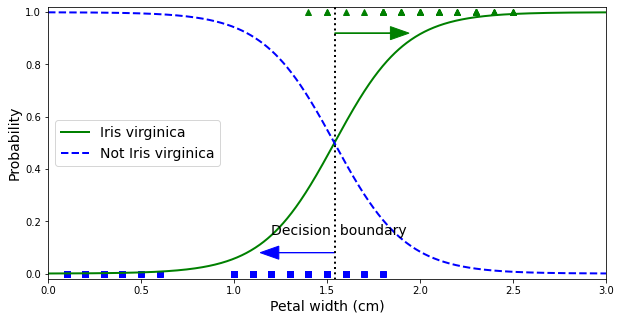

In [4]:
#@title
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lda.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()



The petal width of Iris-Virginica flowers  ranges from 1.4 cm to 2.5 cm, while the other iris flowers (not Iris-Virginica)  generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return which ever class is the most likely. Therefore, there is a decision boundary at around 1.5 cm where both probabilities are equal to 50%: if the petal width is higher than 1.5 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):



In [5]:
print(decision_boundary)

[1.54054054]


In [6]:
lda.predict([[1.7], [1.5]])

array([1, 0])

The next figure shows the same dataset but this time displaying two features: petal width and length. Once trained, the linear discriminant analysis classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. 

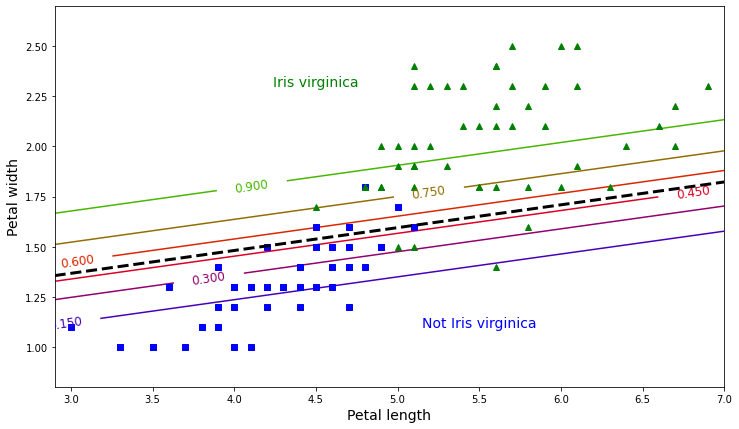

In [7]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = lda.predict_proba(X_new)

plt.figure(figsize=(12, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(lda.coef_[0][0] * left_right + lda.intercept_[0]) / lda.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(5.5, 1.1, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(4.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom) to 90% (top). All the flowers beyond the top line have an over 90% chance of being Iris-Virginica according to the model.

Let's see the model's decision boundary using instead quadratic discriminant analysis.

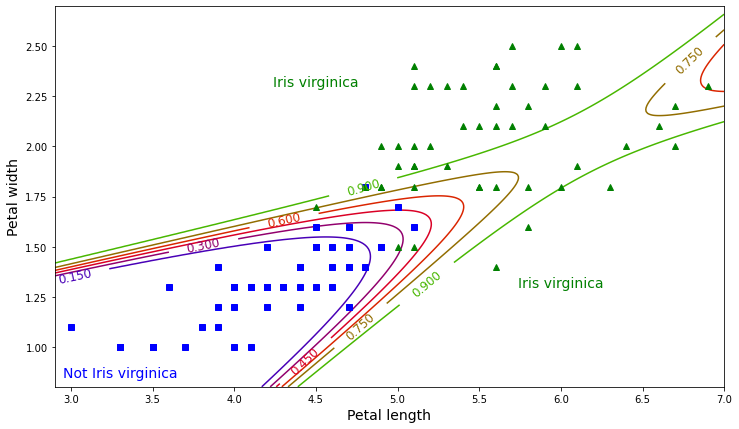

In [8]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = qda.predict_proba(X_new)

plt.figure(figsize=(12, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
plt.clabel(contour, inline=1, fontsize=12)
plt.text(3.3, 0.85, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(4.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.text(6.0, 1.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Naive Bayes

In GDA, the feature vectors $x$ were continuous, real-valued vectors. Let’s now talk about a different learning algorithm in which the feature vectors $x$ are discrete-valued. 

For our motivating example, consider building an email spam filter. Here, we wish to classify messages according to whether they are spam email, or non-spam email.

Let’s say we have a training set. A set of emails labeled as spam or non-spam with diferent features of the email. 

Note that even if some original input attribute (say, the length of the text of the email) were continuous valued, it is quite common to *discretize* it, that is, turn it into a small set of discrete values. For instance, if we use some feature $x_j$ to represent length of the email, we might discretize the continuous values as follows: 


Lenght of email | < 100 | 100-200 | 200-400 | > 400 
--- | --- | --- | --- | --- 
$x_i$ | 1 | 2 | 3 | 4


Having chosen our feature vector, we now want to build a generative model. So, we have to model $p(x|y)$. We will therefore make a very strong assumption. We will assume that the $x_i$’s are conditionally independent given $y$. This assumption is called the **Naive Bayes (NB) assumption**, and the resulting algorithm is called the **Naive Bayes classifier**. This assumption means that $p(x_i|y) =p(x_i|y, x_j)$ for $i,j=1,..,m$ where $n$ is the number of features (note that this is not the same as saying that $x_i$ and $x_j$ are independent, which would have been written $p(x_i) =p(x_i|x_j)$; rather, we are only assuming that $x_i$ and $x_j$ are conditionally independent *given* y).

We now have:

$$p(x_1,...,x_n|y)=p(x_1|y)p(x_2|y,x_1)p(x_3|y,x_1,x_2)...p(x_n|y,x_1,...,x_{n-1}))=p(x_1|y)p(x_2|y)p(x_3|y)...p(x_n|y) = \prod_{j=1}^n p(x_j|y)$$

The first equality simply follows from the usual properties of probabilities,and the second equality used the NB assumption. We note that even though the Naive Bayes assumption is an extremely strong assumptions, the resulting algorithm works well on many problems.

If we suposse that all features $x_j$ are binary-valued (the generalization to where $x_j$ can take values in $\{1,2,...,k_j\}$ is straightforward, we would simply model $p(x_j|y)$ as multinomial rather than as Bernoulli). Then, the model is parametrized by $p(x_j=1|y=1)=\phi_{j|y=1}$, $p(x_j=1|y=0)=\phi_{j|y=0}$, and $p(y=1)=\phi_y$. Given a training set $\{(x^{(i)}, y^{(i)});i=1, . . . , m\}$, we can write down the joint likelihood of the data:

$$L(\phi_y,\phi_{j|y=0},\phi_{j|y=1})=\prod_{i=1}^{m}p(x^{(i)}, y^{(i)})$$

Maximizing this with respect to $\phi_y$,$\phi_{j|y=0}$ and $\phi_{j|y=1}$ gives the maximum likelihood estimates.


\begin{cases}
\phi_{j|y=1}=\frac{\sum_{i=1}^{m}1\{x_j^{(i)}=1 \wedge y^{(i)}=1 \}}{\sum_{i=1}^{m} 1\{ y^{(i)}=0 \}}\\\\
\phi_{j|y=0}=\frac{\sum_{i=1}^{m}1\{x_j^{(i)}=1 \wedge y^{(i)}=0 \}}{\sum_{i=1}^{m} 1\{ y^{(i)}=0 \}}\\\\
\phi_y=\frac{\sum_{i=1}^{m} 1\{ y^{(i)}=1 \}}{m}\\
\end{cases}


Having fit all these parameters, to make a prediction on a new example with features $x$, we then simply calculate

$$p(y=1|x)=\frac{(\prod_{j=1}^{n}p(x_j|y=1))p(y=1)}{(\prod_{j=1}^{n}p(x_j|y=1))p(y=1)+(\prod_{j=1}^{n}p(x_j|y=0))p(y=0)}$$

and pick whichever class has the higher posterior probability.






### Laplace smoothing

Take the problem of estimating the mean of a multinomial random variable $z$ taking values in $\{1,...,k\}$. We can parametrize our multinomial with $\phi_j=p(z=j)$. Given a set of m independent observations $\{z^{(1)}, . . . , z^{(m)}\}$, the maximum likelihood estimates are given by

$$\phi_z=\frac{\sum_{i=1}^{m} 1\{ z^{(i)}=j \}}{m}$$

If we were to use these maximum likelihood estimates,then some of the $\phi_j$’s might end up as zero, which is a problem. To avoid this, we can use **Laplace smoothing**, which replaces the above estimate with

$$\phi_z=\frac{\sum_{i=1}^{m} 1\{ z^{(i)}=j \}+1}{m+k}$$

Here, we have added 1 to the numerator, and $k$ to the denominator. Note that
$\sum_{j=1}^{k}\phi_j=1$ still holds, which is a desirable property since the $\phi_j$’s are estimates for probabilities that we know must sum to 1.Also, $\phi_j \neq 0$ for all values of $j$, solving our problem of probabilities being estimated as zero. Under certain (arguably quite strong) conditions, it can be shown that the Laplace smoothing actually gives the optimal estimator of the $\phi_j$’s. 

Returning to our Naive Bayes classifier, with Laplace smoothing, we therefore obtain the following estimates of the parameters:

\begin{cases}
\phi_{j|y=1}=\frac{\sum_{i=1}^{m}1\{x_j^{(i)}=1 \wedge y^{(i)}=1 \}+1}{\sum_{i=1}^{m} 1\{ y^{(i)}=0 \}+2}\\\\
\phi_{j|y=0}=\frac{\sum_{i=1}^{m}1\{x_j^{(i)}=1 \wedge y^{(i)}=0 \}+1}{\sum_{i=1}^{m} 1\{ y^{(i)}=0 \}+2}\\
\end{cases}


(In practice, it usually doesn’t matter much whether we apply Laplace s-moothing to $\phi_y$ or not, since we will typically have a fair fraction each of spam and non-spam emails, so $\phi_y$ will be a reasonable estimate of $p(y= 1)$ and will be quite far from 0 anyway.)



### Naive bayes in Scikit-Learn

Let’s use the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let’s try to build a classifier to detect the Iris-Virginica type based on two features: the petal width and length.

In [9]:
from sklearn.naive_bayes import GaussianNB

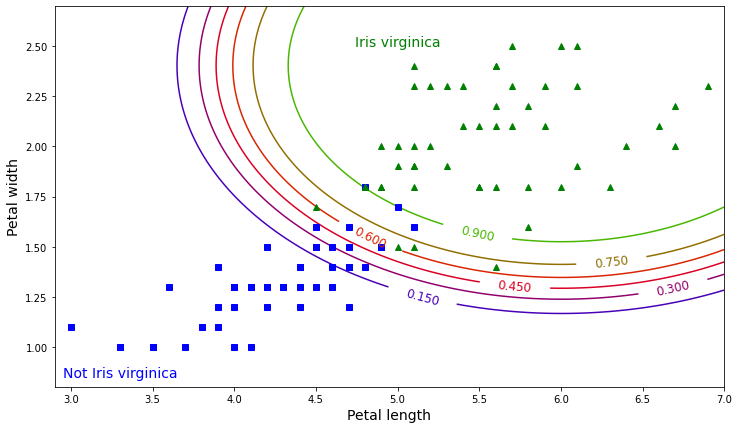

In [10]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

nb = GaussianNB()
nb.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = nb.predict_proba(X_new)

plt.figure(figsize=(12, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
plt.clabel(contour, inline=1, fontsize=12)
plt.text(3.3, 0.85, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(5.0, 2.5, "Iris virginica", fontsize=14, color="g", ha="center")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# References

- [Generative learning algorithms, Stanford notes](http://cs229.stanford.edu/notes/cs229-notes2.pdf), [video](https://www.youtube.com/watch?v=nt63k3bfXS0&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=5)

- [Scikit-learn: Linear and Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)

- [Scikit-learn: Naive bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

- [Discriminant analysis](http://www.di.fc.ul.pt/~jpn/r/discriminant_analysis/discriminant_analysis.html)



